In [7]:
import pandas as pd
import numpy as np

# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 복잡하고 정교한 시각화
import plotly.graph_objs as go
# 간단한 시각화
import plotly.express as px

from plotly.subplots import make_subplots

# 결측값 시각화 라이브러리
import missingno


from sklearn.preprocessing import LabelEncoder

# 생성한 그래프를 표시
%matplotlib inline

In [8]:
# EDA 결과 저장할 경로
PATH = '/.'

In [7]:
f = open(PATH + 'EDA idea.txt', 'w')

In [9]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [10]:
print(train.shape, test.shape)

(256351, 69) (90067, 68)


In [11]:
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

<Axes: >

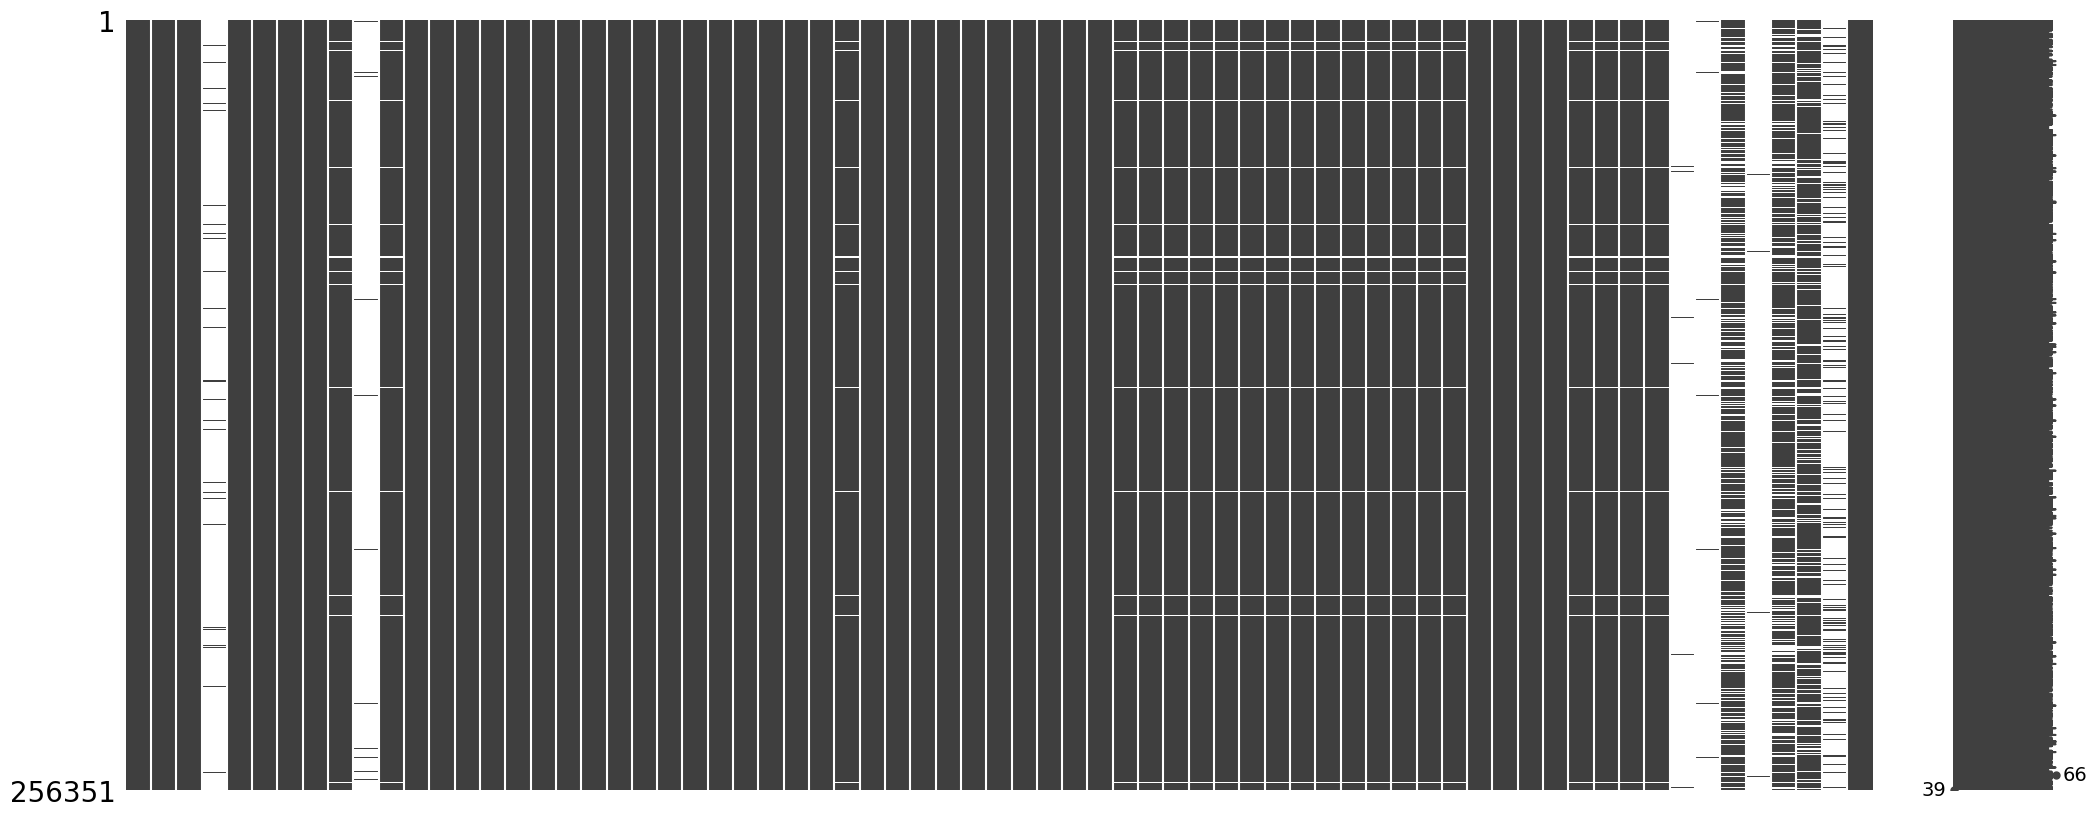

In [17]:
missingno.matrix(train)

In [13]:
print(train.isnull().sum())

ID                            0
시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    246981
시술 유형                         0
                          ...  
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
임신 성공 여부                      0
Length: 69, dtype: int64


In [28]:
df_new = train.drop(columns=categorical_columns)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 2   총 생성 배아 수              250060 non-null  float64
 3   미세주입된 난자 수             250060 non-null  float64
 4   미세주입에서 생성된 배아 수        250060 non-null  float64
 5   이식된 배아 수               250060 non-null  float64
 6   미세주입 배아 이식 수           250060 non-null  float64
 7   저장된 배아 수               250060 non-null  float64
 8   미세주입 후 저장된 배아 수        250060 non-null  float64
 9   해동된 배아 수               250060 non-null  float64
 10  해동 난자 수                250060 non-null  float64
 11  수집된 신선 난자 수            250060 non-null  float64
 12  저장된 신선 난자 수            250060 non-null  float64
 13  혼합된 난자 수               250060 non-null  float64
 14  파트너 정자와 혼합된 난자 수       250060 non-nu

ID                            0
임신 시도 또는 마지막 임신 경과 연수    246981
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
임신 성공 여부                      0
dtype: int64


<Axes: >

/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46608 (\N{HANGUL SYLLABLE DDO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  func(*args

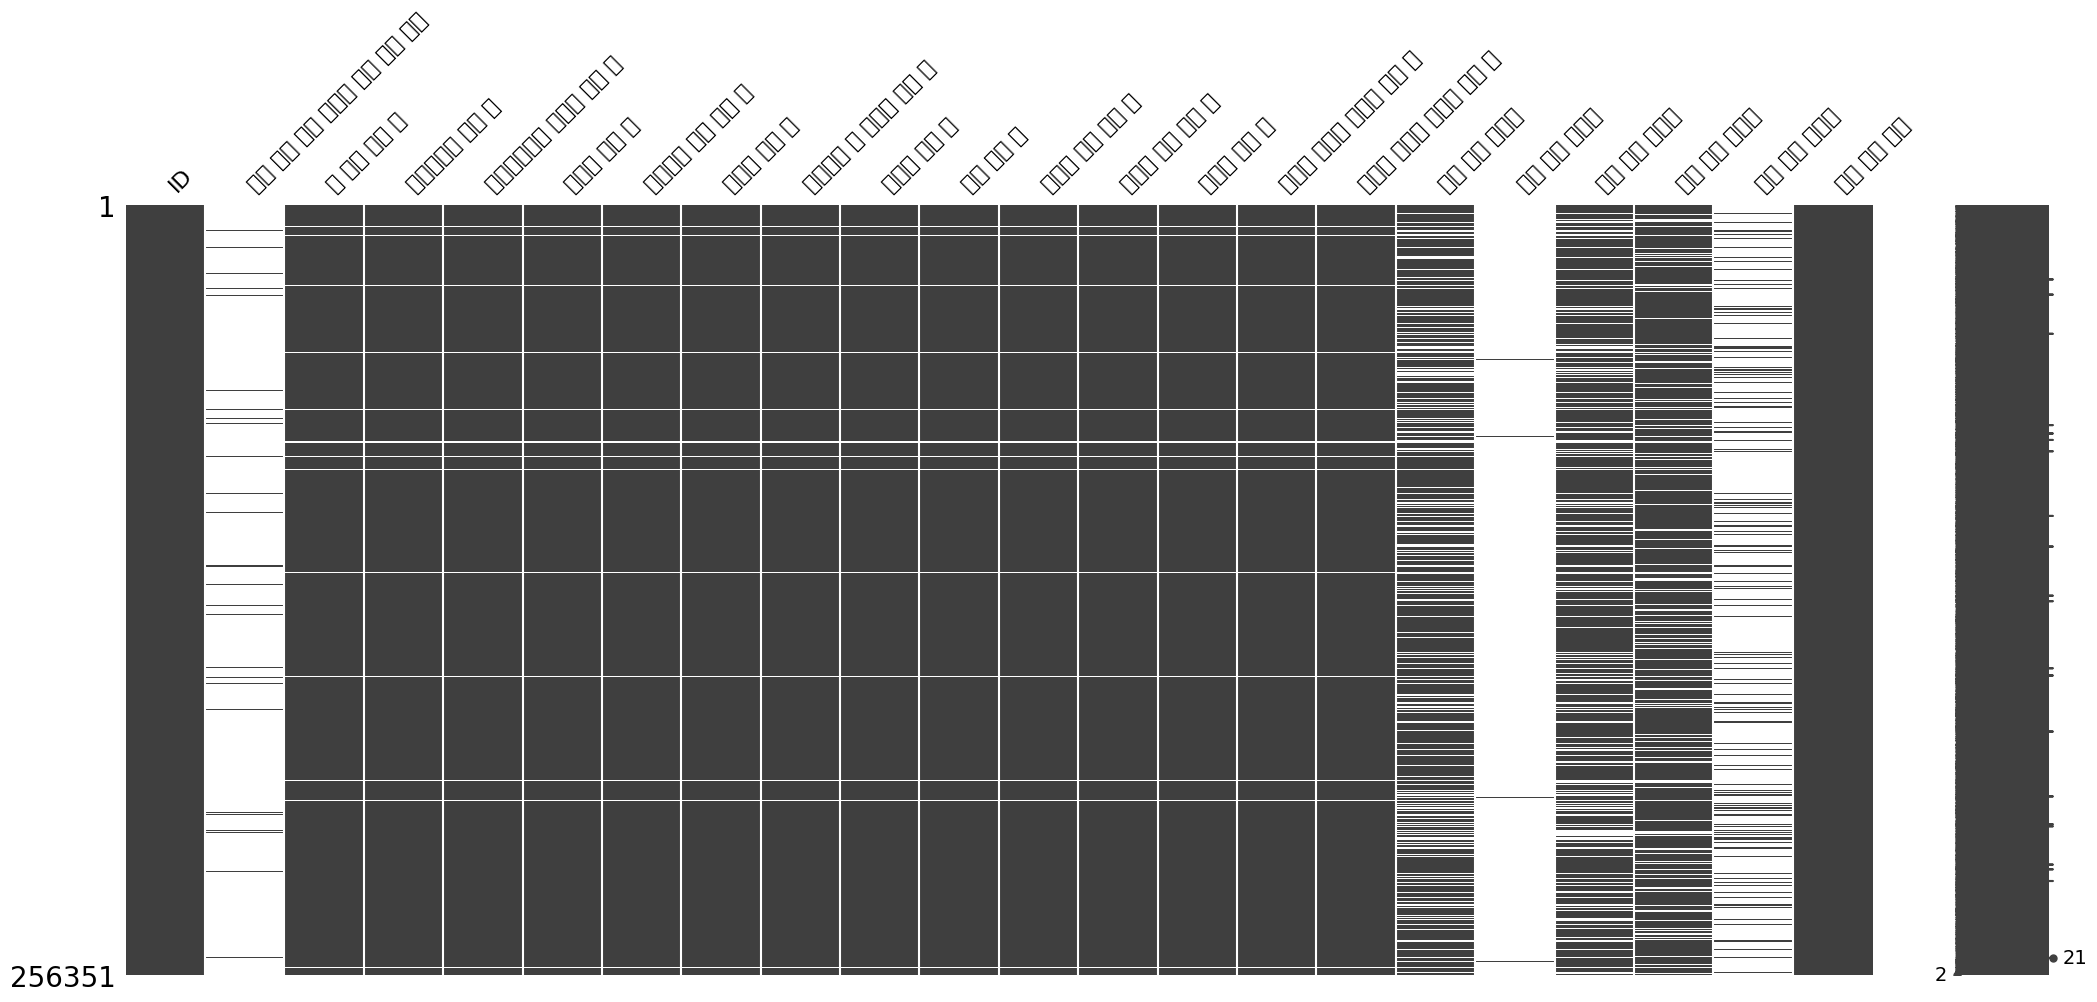

In [17]:
print(df_new.isnull().sum())
missingno.matrix(df_new)

### 결측치가 20만개 이상인 컬럼은 삭제

In [29]:
df_droped = df_new.drop(columns=['임신 시도 또는 마지막 임신 경과 연수', '배아 해동 경과일', '난자 해동 경과일'])

In [32]:
df_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                256351 non-null  object 
 1   총 생성 배아 수         250060 non-null  float64
 2   미세주입된 난자 수        250060 non-null  float64
 3   미세주입에서 생성된 배아 수   250060 non-null  float64
 4   이식된 배아 수          250060 non-null  float64
 5   미세주입 배아 이식 수      250060 non-null  float64
 6   저장된 배아 수          250060 non-null  float64
 7   미세주입 후 저장된 배아 수   250060 non-null  float64
 8   해동된 배아 수          250060 non-null  float64
 9   해동 난자 수           250060 non-null  float64
 10  수집된 신선 난자 수       250060 non-null  float64
 11  저장된 신선 난자 수       250060 non-null  float64
 12  혼합된 난자 수          250060 non-null  float64
 13  파트너 정자와 혼합된 난자 수  250060 non-null  float64
 14  기증자 정자와 혼합된 난자 수  250060 non-null  float64
 15  난자 채취 경과일         198863 non-null  float64
 16  난자 혼합 경과일         20

In [40]:
df_droped.isna().sum()

ID                      0
총 생성 배아 수            6291
미세주입된 난자 수           6291
미세주입에서 생성된 배아 수      6291
이식된 배아 수             6291
미세주입 배아 이식 수         6291
저장된 배아 수             6291
미세주입 후 저장된 배아 수      6291
해동된 배아 수             6291
해동 난자 수              6291
수집된 신선 난자 수          6291
저장된 신선 난자 수          6291
혼합된 난자 수             6291
파트너 정자와 혼합된 난자 수     6291
기증자 정자와 혼합된 난자 수     6291
난자 채취 경과일           57488
난자 혼합 경과일           53735
배아 이식 경과일           43566
임신 성공 여부                0
dtype: int64

### 결측치는 평균값으로 대체

In [38]:
df_fill = df_droped.fillna(df_droped.mean(numeric_only=True))
df_fill.head(20)

,ID,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 채취 경과일,난자 혼합 경과일,배아 이식 경과일,임신 성공 여부
0,TRAIN_000000,4.000000,5.000000,4.00000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,7.000000,0.000000,5.000000,5.000000,0.000000,0.0,0.000000,3.000000,0
1,TRAIN_000001,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,3.254741,0
2,TRAIN_000002,5.000000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,7.000000,7.000000,0.000000,0.0,0.000000,2.000000,0
3,TRAIN_000003,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,4.000000,4.000000,0.000000,0.0,0.000000,3.254741,0
4,TRAIN_000004,6.000000,6.000000,6.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,6.000000,6.000000,0.000000,0.0,0.000000,3.000000,0
5,TRAIN_000005,3.000000,5.000000,3.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.000000,5.000000,0.000000,0.0,0.000000,3.000000,0
6,TRAIN_000006,4.000000,4.000000,4.00000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.0,0.000000,2.000000,0
7,TRAIN_000007,12.000000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,15.000000,15.000000,0.000000,0.0,0.000000,5.000000,0
8,TRAIN_000008,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.005385,3.254741,0
9,TRAIN_000009,2.000000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.0,0.000000,3.000000,0


In [41]:
df_fill.isna().sum()

ID                  0
총 생성 배아 수           0
미세주입된 난자 수          0
미세주입에서 생성된 배아 수     0
이식된 배아 수            0
미세주입 배아 이식 수        0
저장된 배아 수            0
미세주입 후 저장된 배아 수     0
해동된 배아 수            0
해동 난자 수             0
수집된 신선 난자 수         0
저장된 신선 난자 수         0
혼합된 난자 수            0
파트너 정자와 혼합된 난자 수    0
기증자 정자와 혼합된 난자 수    0
난자 채취 경과일           0
난자 혼합 경과일           0
배아 이식 경과일           0
임신 성공 여부            0
dtype: int64